# Facial Keypoint Detection

---

In this project, I have built an end-to-end facial keypoint recognition system. Facial keypoints include points around the eyes, nose, and mouth on a face and are used in many applications such as emotion recognition, snapchat filters etc.

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

* [Step 5](#step5): Create a CNN to Recognize Facial Keypoints
* [Step 6](#step6): Compile and Train the Model
* [Step 7](#step7): Visualize the Loss

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image

* [Step 8](#step7): Build a Robust Facial Keypoints Detector



---
<a id='step0'></a>
## Step 0: Detect Faces Using a Haar Cascade Classifier

Classification problem is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else. 

I have used OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).


### Import Resources 

In [1]:
# Import required libraries 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image
import time
import pandas as pd

By default OpenCV assumes the ordering of our image's color channels are Blue, then Green, then Red.  This is slightly out of order with most image types I have used in these experiments, whose color channels are ordered Red, then Green, then Blue.  In order to switch the Blue and Red channels of our test image around I have used OpenCV's ```cvtColor``` function.

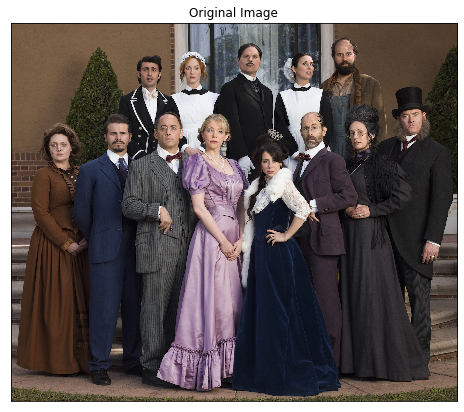

In [2]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

There are 13 faces in this picture. I have used a Haar Cascade classifier to detect all the faces in this test image.

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, I have first converted the image from color to grayscale. 

Then, the trained architecture of the face detector is loaded and used to find faces.

Number of faces detected: 13


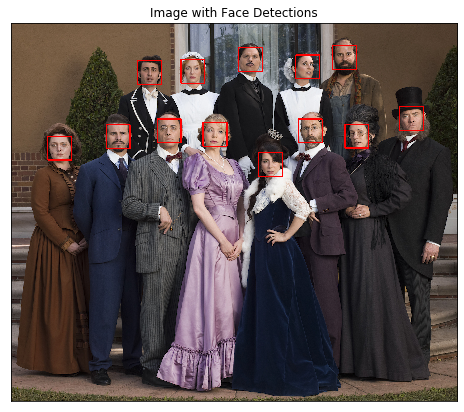

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step1'></a>

## Step 1: Add Eye Detections

To test the eye detector, I have first read in a new test image just a single face.

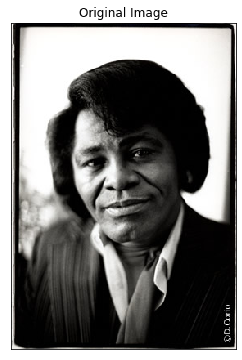

In [4]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Though the image is a black and white image but then we have read it in as a color image and so it is needed to be converted to grayscale in order to perform the most accurate face detection.

So, the next step is to convert this image to grayscale, then load OpenCV's face detector and run it with parameters that detect this face accurately.

Number of faces detected: 1


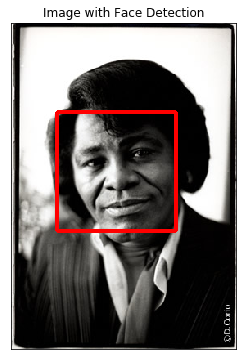

In [5]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### Add an eye detector to the current face detection setup.  

To set up an eye detector, I have used the eye cascade detector. 

Number of faces detected: 1
Number of eyes detected: 2


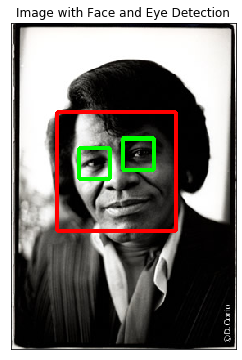

In [6]:
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  

    
# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Detect the faces in image
eyes = eye_cascade.detectMultiScale(gray, 1.02, 3)

print('Number of eyes detected:', len(eyes))

for (x,y,w,h) in eyes:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(0,255,0), 3)  


fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

---
<a id='step2'></a>

## Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

I have explore OpenCV's noise-removal functionality to clean up a noisy image, which can then be fed into our trained face detector.

### Create a noisy image to work with

I have create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but image noise or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

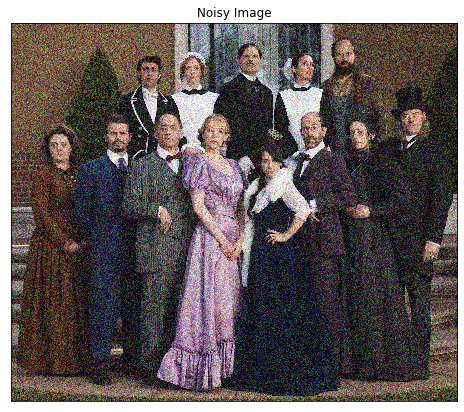

In [7]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_with_noise = np.asarray(image)
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

image_with_noise = image_with_noise + noise

image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

I have applied the same trained OpenCV detector with the same settings as before, to see what sort of detections are obtained.

Number of faces detected: 11


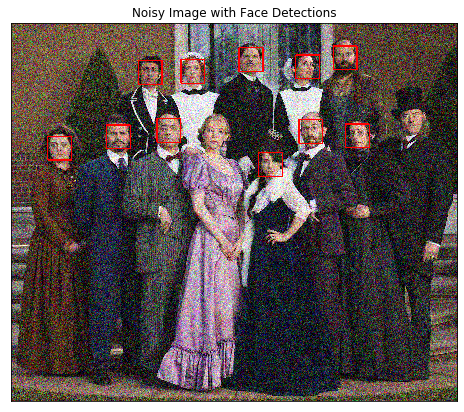

In [8]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

print('Number of faces detected:', len(faces))

image_with_detections = np.copy(image_with_noise)

for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

### De-noise this image for better face detection

I have now de-noised this image enough so that all the faces in the image are properly detected.

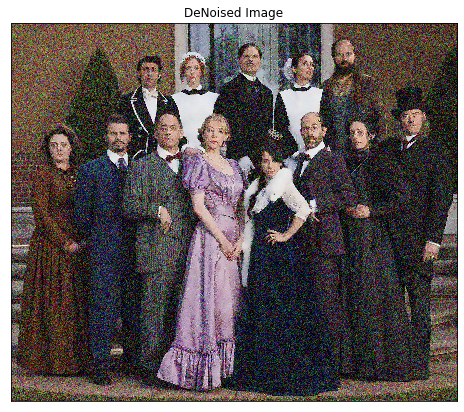

In [9]:
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise,None,10,10,7,21)#to de-noise the image 

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image')
ax1.imshow(denoised_image)

I have used the trained detector to detect the faces in the image.

Number of faces detected: 13


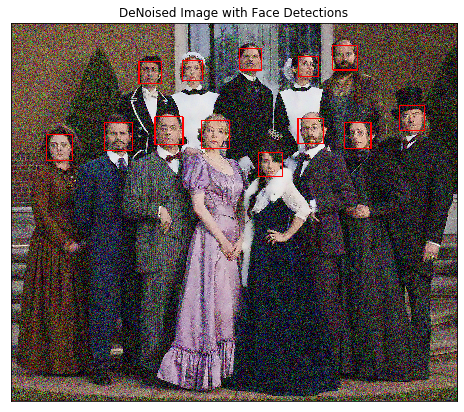

In [10]:
gray_noise_denoise = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

faces_denoise = face_cascade.detectMultiScale(gray_noise_denoise, 1.3, 6)

print('Number of faces detected:', len(faces_denoise))

image_with_detections_denoise = np.copy(denoised_image)

for (x,y,w,h) in faces_denoise:
    cv2.rectangle(image_with_detections_denoise, (x,y), (x+w,y+h), (255,0,0), 3)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image with Face Detections')
ax1.imshow(image_with_detections_denoise)

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

### Importance of Blur in Edge Detection

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that. Edge detection is a **convolution** performed on the image itself.

### Canny edge detection

In the cell below I have loaded in a test image, then applied *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  The result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

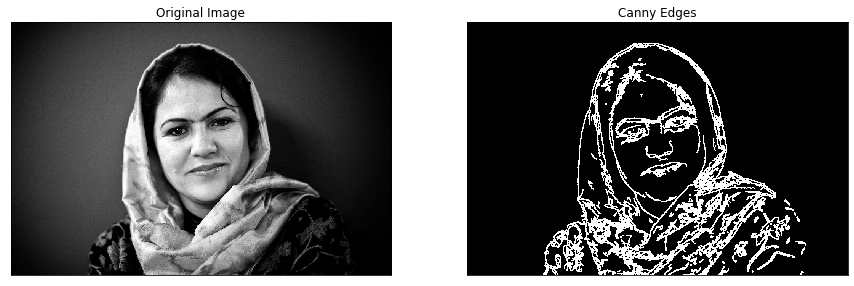

In [11]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector.

### Blur the image *then* perform edge detection

I have repeated this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

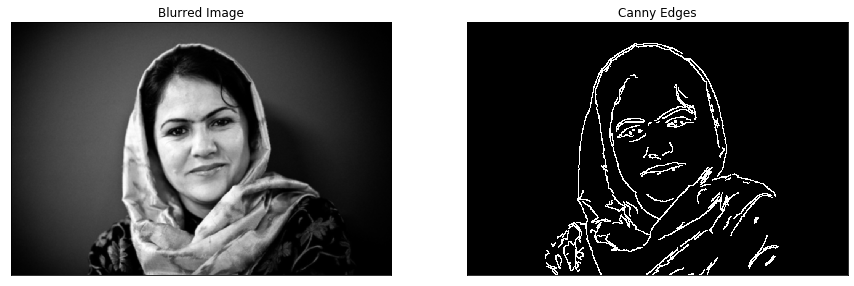

In [12]:
orig_img = np.copy(image)
kernel = np.ones((4,4),np.float32)/16
blur = cv2.filter2D(orig_img,-1,kernel)

# Perform Canny edge detection on blurred image
edges_blur = cv2.Canny(blur,100,200)

# Dilate the image to amplify edges
edges_blur = cv2.dilate(edges_blur, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Blurred Image')
ax1.imshow(blur)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges_blur, cmap='gray')

---
<a id='step4'></a>

## Step 4: Automatically Hide the Identity of an Individual

### Read in an image to perform identity detection

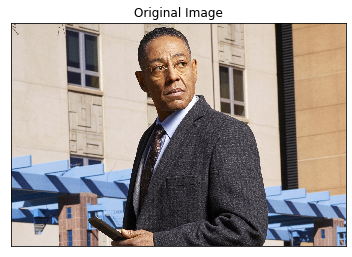

In [13]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

### Use blurring to hide the identity of an individual in an image

The idea here is to 1) automatically detect the face in this image, and then 2) blur it out!

Number of faces detected: 1


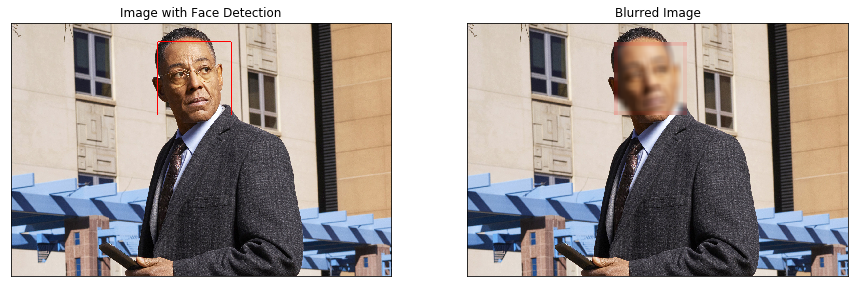

In [14]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 5)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    face_crop = image_with_detections[y:y+h, x:x+w]
    

# Display the image with the detections
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

## Blur the bounding box around each detected face using an averaging filter and display the result
result_image = np.copy(image)
kernel_2 = np.ones((40,40),np.float32)/1600
blur_2 = cv2.filter2D(face_crop,-1,kernel_2)
result_image[y:y+blur_2.shape[0], x:x+blur_2.shape[1]] = blur_2

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Blurred Image')
ax2.imshow(result_image)

---
<a id='step5'></a>

## Step 5: Create a CNN to Recognize Facial Keypoints

I have created my own end-to-end pipeline - employing convolutional networks in keras along with OpenCV to detect facial keypoints.  

I have started by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces.  

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

### Make a facial keypoint detector

At a higher level, the facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because the input data are images, I have employed a *convolutional neural network* to recognize patterns in the images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, I have used a training set - a set of facial image / facial keypoint pairs to train on.  For this I have used [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints that have been placed by hand, and recorded in $(x, y)$ coordinates.

In [16]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


The coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$. 

### Visualize the Training Data

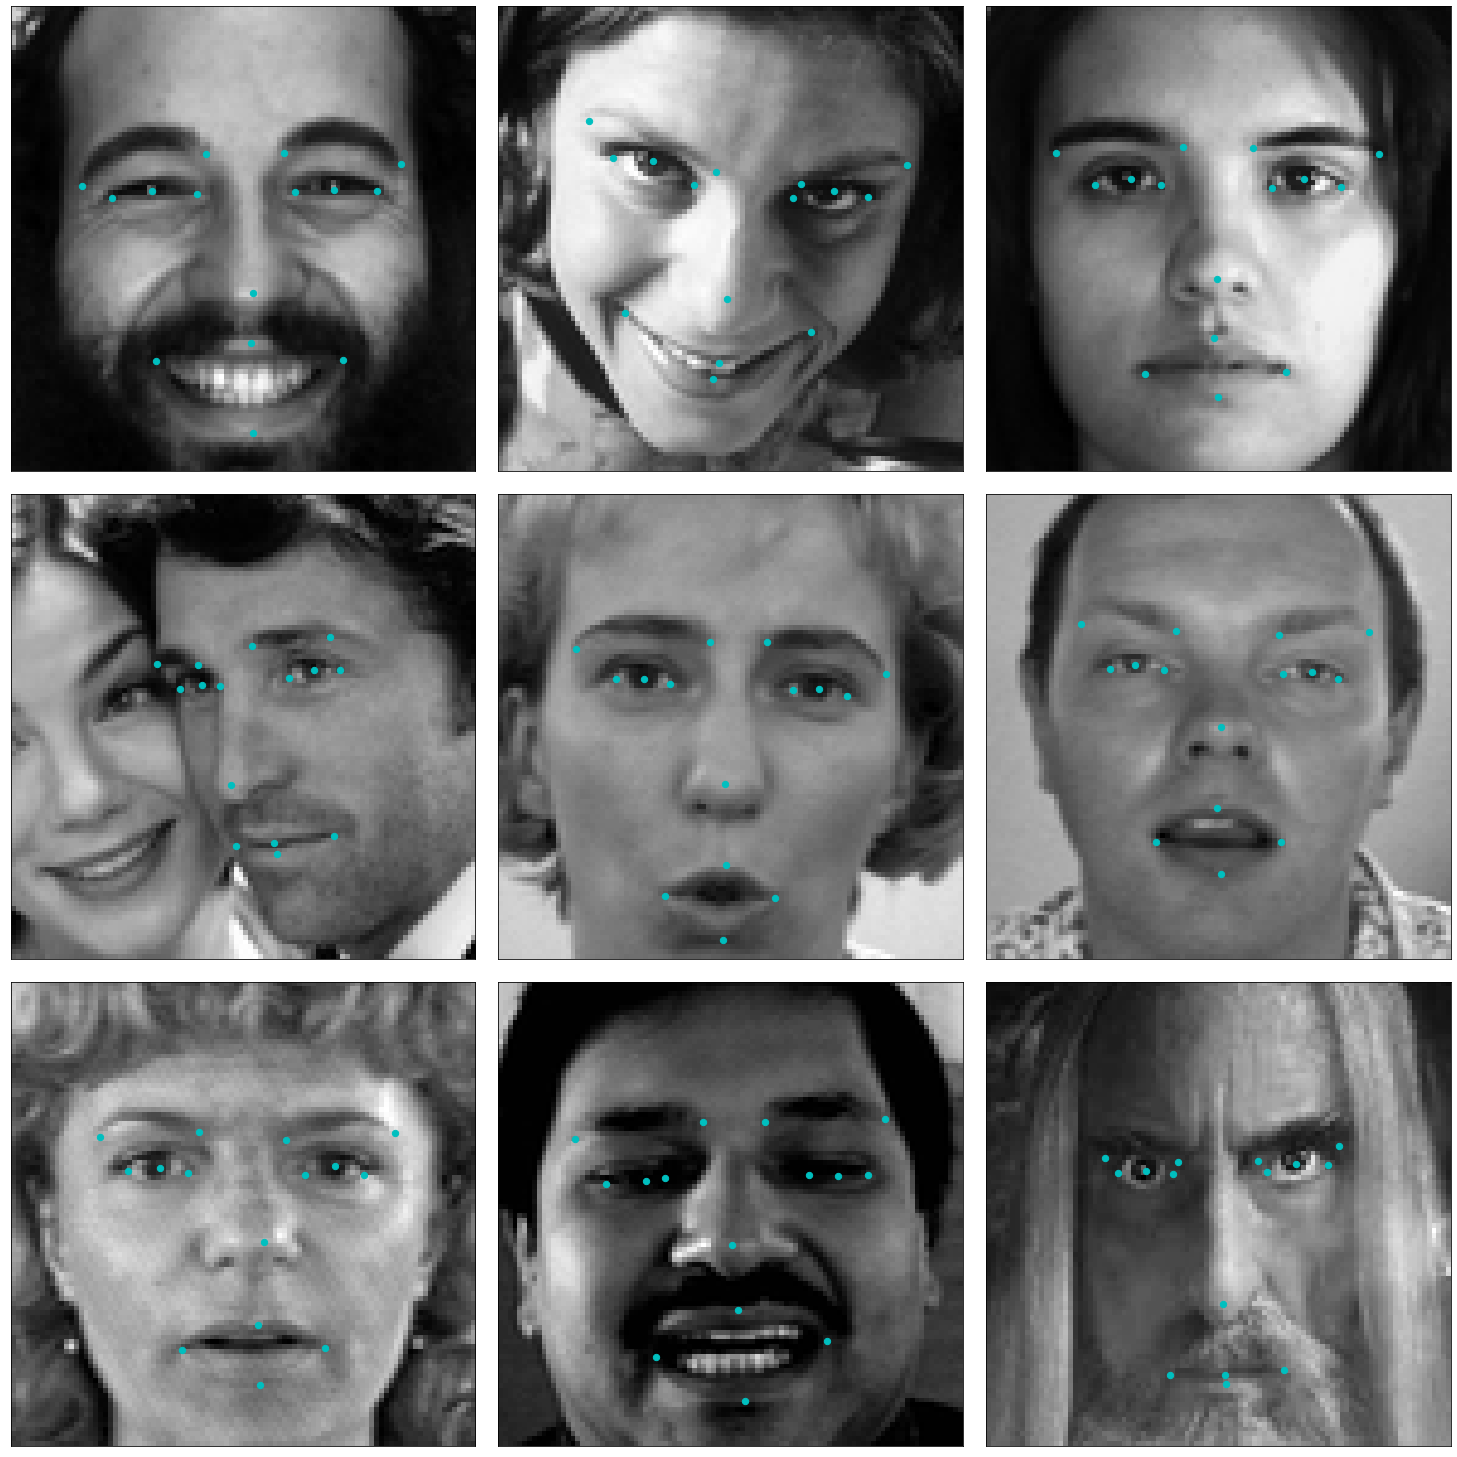

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.

### Build the CNN Architecture

A neural network is built for predicting the locations of facial keypoints.

The network accepts a $96 \times 96$ grayscale image as input and outputs a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.

In [18]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization


# Build a CNN architecture

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))


# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

---
<a id='step6'></a>

## Step 6: Compile and Train the Model

In [19]:
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam

hist = History()
epochs = 50
batch_size = 64

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist_final = model.fit(X_train, y_train, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)


model.save('my_model_final.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 24s 14ms/step - loss: 0.0303 - accuracy: 0.4842 - val_loss: 0.0076 - val_accuracy: 0.6963

Epoch 00001: val_loss improved from inf to 0.00758, saving model to weights.final_2.hdf5
Epoch 2/50
1712/1712 [==============================] - 21s 12ms/step - loss: 0.0091 - accuracy: 0.6051 - val_loss: 0.0050 - val_accuracy: 0.6963

Epoch 00002: val_loss improved from 0.00758 to 0.00495, saving model to weights.final_2.hdf5
Epoch 3/50
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0068 - accuracy: 0.6320 - val_loss: 0.0046 - val_accuracy: 0.6963

Epoch 00003: val_loss improved from 0.00495 to 0.00460, saving model to weights.final_2.hdf5
Epoch 4/50
1712/1712 [==============================] - 21s 12ms/step - loss: 0.0061 - accuracy: 0.6525 - val_loss: 0.0044 - val_accuracy: 0.6963

Epoch 00004: val_loss improved from 0.00460 to 0.00442, saving model to weights.final_2.hd

In [20]:
model.load_weights('weights.final_2.hdf5')

---
<a id='step7'></a>

## Step 7: Visualize the Loss and Test Predictions

The training and validation loss of the trained neural network.

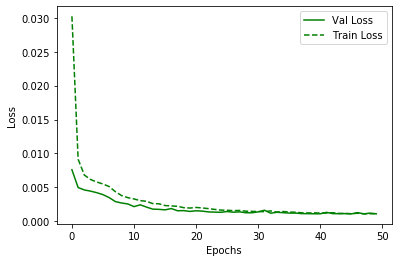

In [21]:
# Visualize the training and validation loss of the neural network
plt.plot(range(epochs), hist_final.history[
         'val_loss'], 'g-', label='Val Loss')
plt.plot(range(epochs), hist_final.history[
         'loss'], 'g--', label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualize a Subset of the Test Predictions

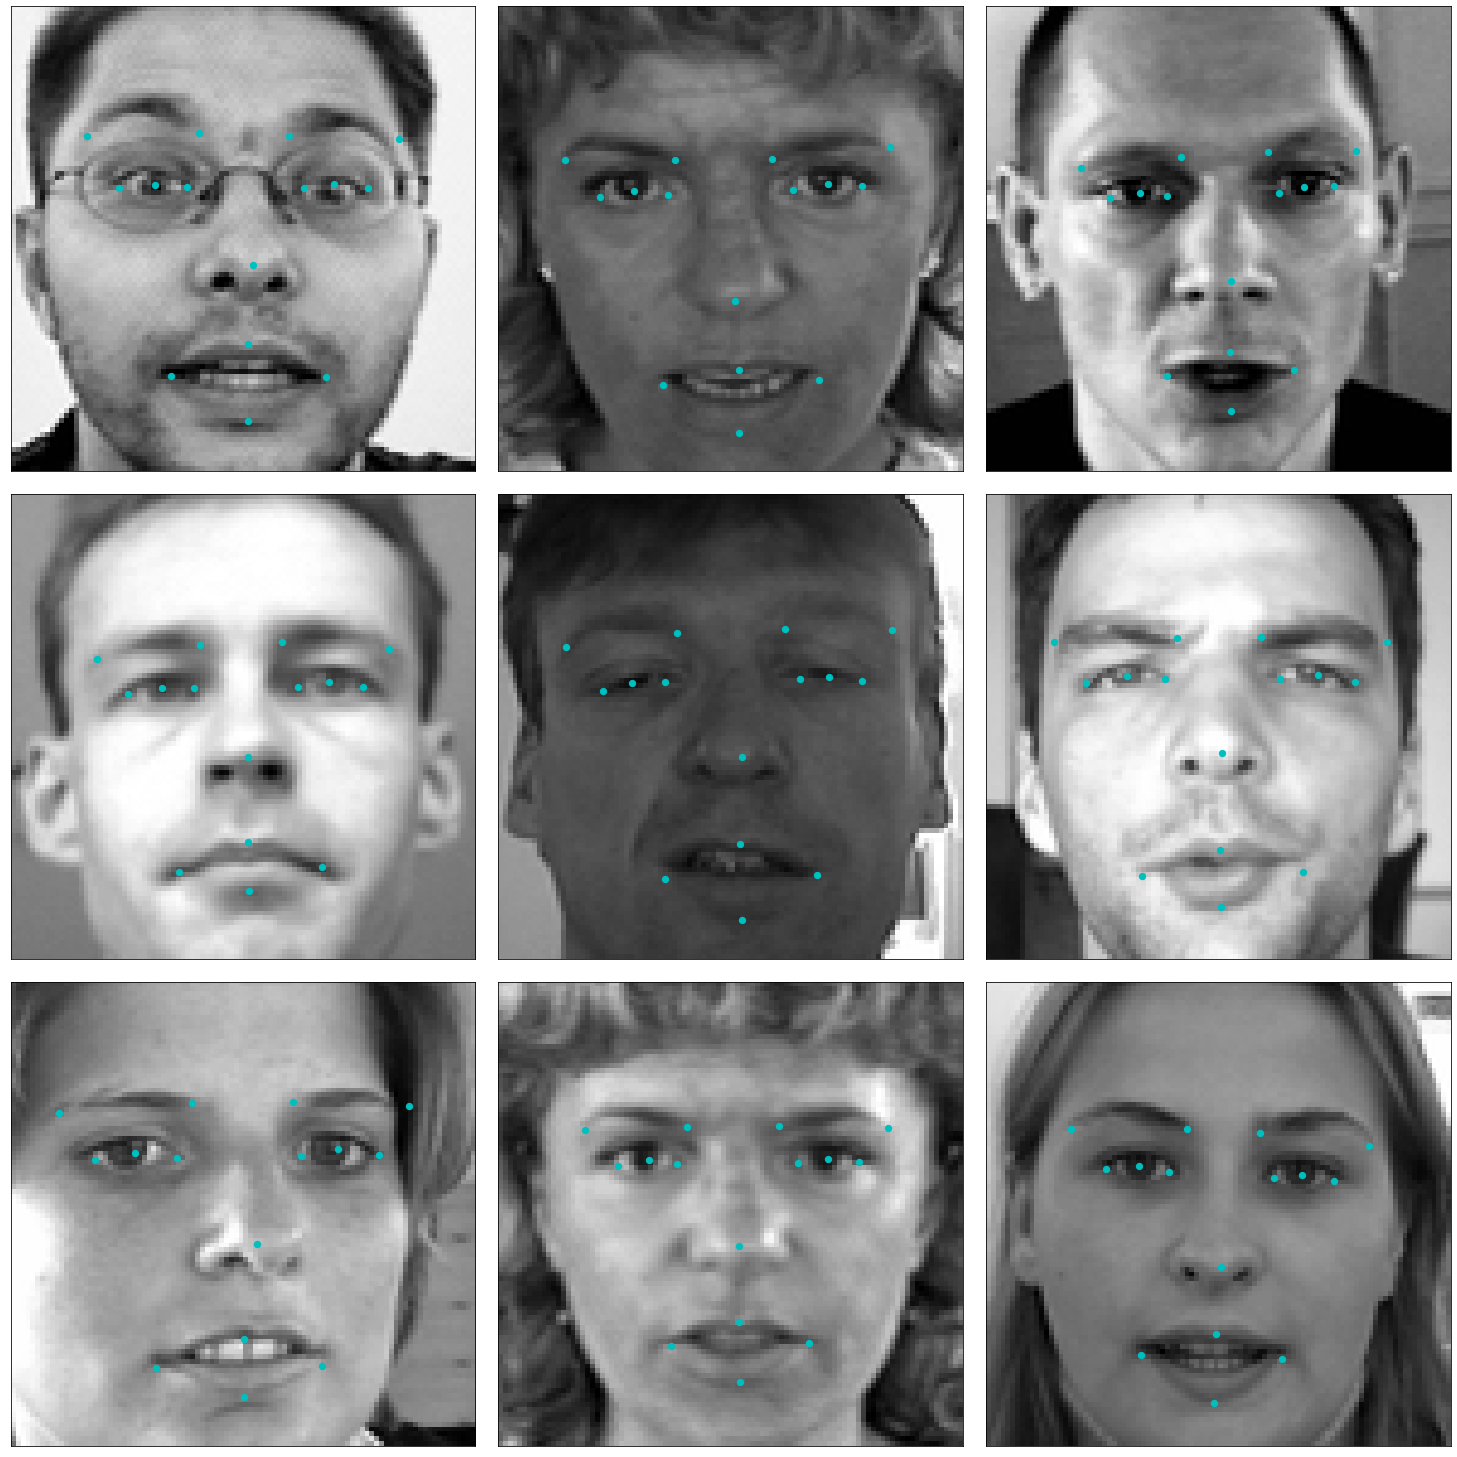

In [22]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

---
<a id='step8'></a>

## Step 8: Complete the pipeline

- Detect the faces in this image automatically
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

### Facial Keypoints Detector

Our function should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

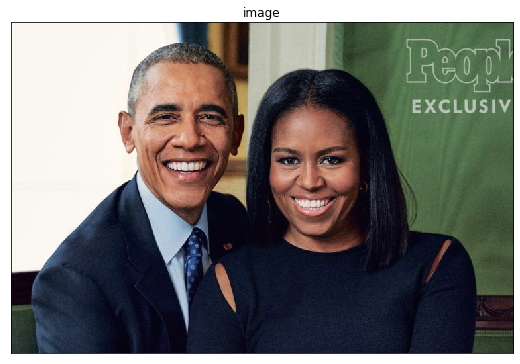

In [23]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image')
ax1.imshow(image)

In [24]:
# Use the face detection code with our trained conv-net
def plot_keypoints(img_path, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scale, neighbors)
    fig = plt.figure(figsize=(40, 40))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints')

    print('Number of faces detected:', len(faces))

    image_with_detections = np.copy(img)

    for (x,y,w,h) in faces:
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        bgr_crop = image_with_detections[y:y+h, x:x+w] 
        orig_shape_crop = bgr_crop.shape
        gray_crop = cv2.cvtColor(bgr_crop, cv2.COLOR_BGR2GRAY)
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255
        model = load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=-1), axis=0)))
        ax.scatter(((landmarks[0::2] * 48 + 48)*orig_shape_crop[0]/96)+x, 
                   ((landmarks[1::2] * 48 + 48)*orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
        
    ax.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))

Number of faces detected: 2


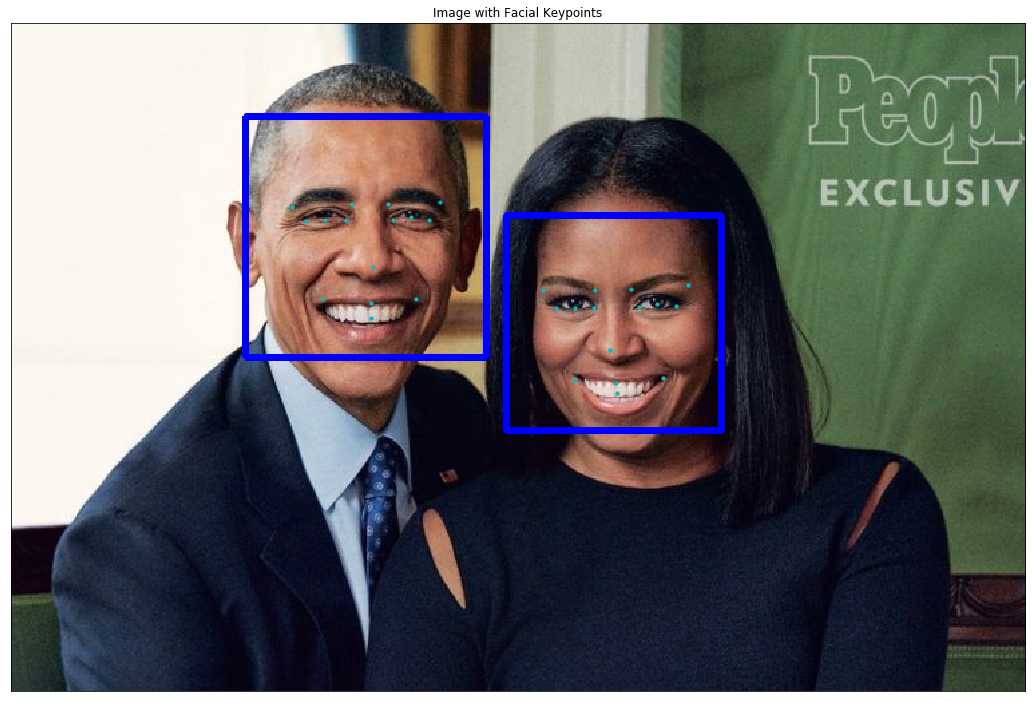

In [25]:
# Paint the predicted keypoints on the test image
obamas = plot_keypoints('images/obamas4.jpg',
                        'detector_architectures/haarcascade_frontalface_default.xml',
                        'my_model_final.h5')

Number of faces detected: 1


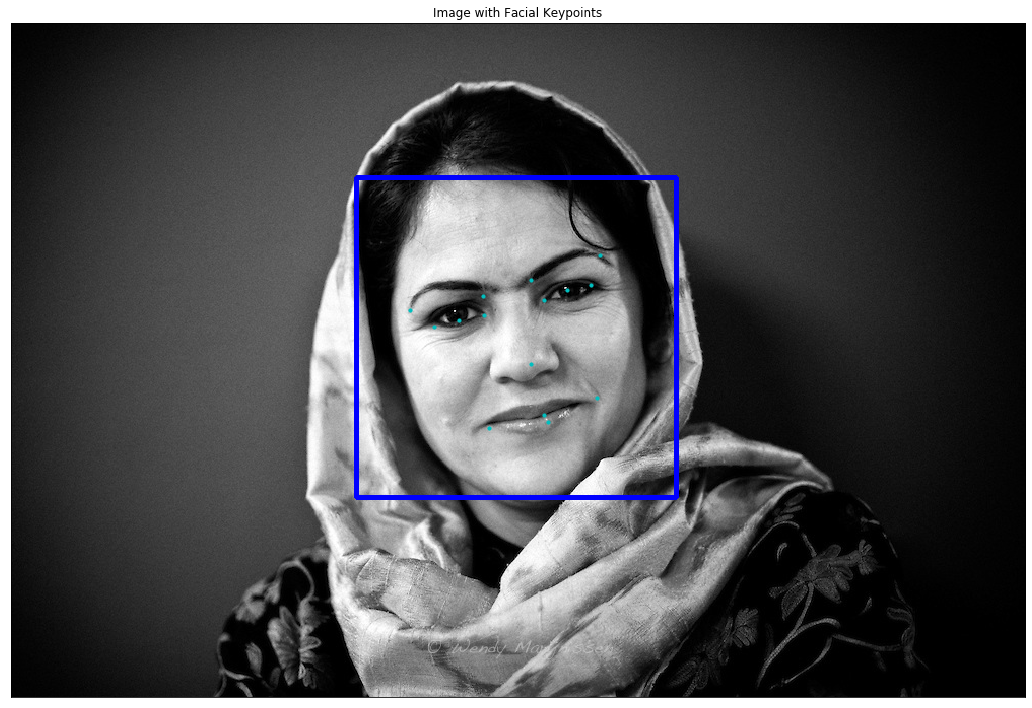

In [35]:
# Paint the predicted keypoints on the test image
obamas = plot_keypoints('images/fawzia.jpg',
                        'detector_architectures/haarcascade_frontalface_default.xml',
                        'my_model_final.h5')

Number of faces detected: 2


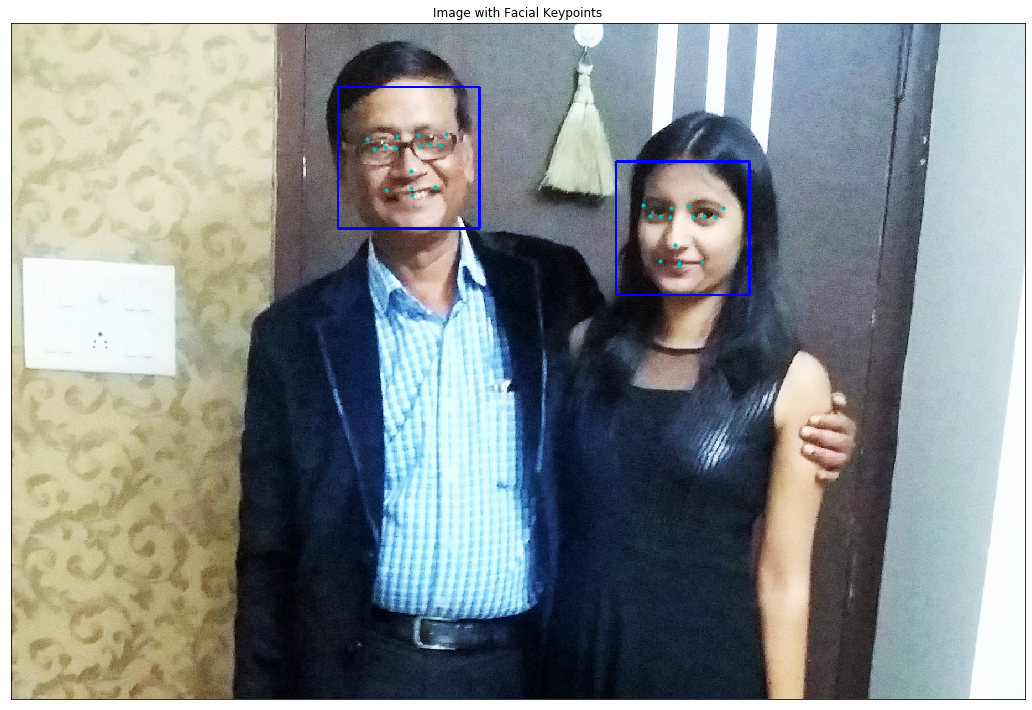

In [39]:
# Paint the predicted keypoints on the test image
obamas = plot_keypoints('images/pic2.jpg',
                        'detector_architectures/haarcascade_frontalface_default.xml',
                        'my_model_final.h5')